In [1]:
import face_recognition
import os
from os import path
import shutil
import numpy as np

In [59]:
os.getcwd()

'/home/piai/Data/out2'

In [2]:
_path = os.getcwd() + "/"
_file = "face"

In [71]:
for i in range(1, 100):
    _path = os.getcwd() + "/"
    _file = "face"
    if not path.isdir(_file):
        os.makedirs(_file)
    if i < 10:
        _num = "000" + str(i)
        image = face_recognition.load_image_file("seed%s.png" % (_num))
        face_locations = face_recognition.face_locations(image)
        if face_locations != []:
            source = r"seed%s.png" % (_num)
            destination = r"%s/seed%s.png" % (_file, _num)
            shutil.copyfile(_path + source, _path +destination)
    else:
        _num = "00" + str(i)
        image = face_recognition.load_image_file("seed%s.png" % (_num))
        face_locations = face_recognition.face_locations(image)
        if face_locations != []:
            source = r"seed%s.png" % (_num)
            destination = r"%s/seed%s.png" % (_file, _num)
            shutil.copyfile(_path + source, _path +destination)

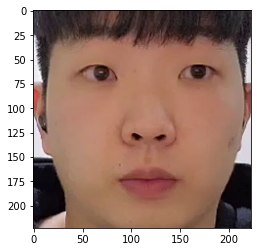

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

def get_cropped_face(image_file):

    image = face_recognition.load_image_file(image_file)    # 이미지 불러오기
    face_locations = face_recognition.face_locations(image)   # 얼굴 영역 박스 
    a, b, c, d = face_locations[0]     # 얼굴 영역 박스 좌표
    cropped_face = image[a:c,d:b,:]    # 얼굴 영역 박스 좌표를 이용해 얼굴 잘라내기 
    return cropped_face              
    
image_path = r'%starget/target.png' % (_path)

# 얼굴 잘라내는 함수 호출
cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)    # 잘라낸 이미지 출력

In [5]:
face = get_cropped_face(image_path)
def get_face_embedding(face):
    return face_recognition.face_encodings(face)   # FaceNet 얼굴 임베딩 모델 이용

In [6]:
get_face_embedding(face)

[array([-0.04724396,  0.0624153 , -0.00536516, -0.0395438 , -0.07404644,
        -0.05768493, -0.05077381, -0.09884935,  0.07990028, -0.10169656,
         0.15650798, -0.07585934, -0.23788612, -0.10762563, -0.06321535,
         0.17579082, -0.13983063, -0.14530121, -0.06544115,  0.00369184,
         0.13913886,  0.04392799, -0.04557808,  0.00174202, -0.08613797,
        -0.28707206, -0.06125254, -0.05990563, -0.01520217, -0.02608501,
        -0.03640752,  0.06121533, -0.18041335, -0.04306161,  0.06629442,
         0.07833761,  0.00450871, -0.0541328 ,  0.17082514, -0.00946551,
        -0.22725487,  0.00818891,  0.05548341,  0.23301548,  0.16210097,
         0.01093616,  0.02423994, -0.15318963,  0.13559309, -0.1440576 ,
         0.02295169,  0.1558274 ,  0.09382987,  0.08453823,  0.01649553,
        -0.14308278,  0.0562393 ,  0.11779017, -0.14111046,  0.01208421,
         0.11903451, -0.07103744, -0.03327482, -0.13162766,  0.21755557,
        -0.01035689, -0.14697364, -0.1838766 ,  0.1

In [7]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file) # 경로를 병합하여 새 경로 생성
        try: 
            face = get_cropped_face(img_path)    # 얼굴 영역만 자른 이미지
        except:                                  # 인식하지 못하는 이미지는 넘어감
            continue
            
        embedding = get_face_embedding(face)   # 얼굴 영역에서 얼굴 임베딩 벡터를 추출
        if len(embedding) > 0:   # 얼굴 영역이 제대로 detect되지 않았을 경우를 대비
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담긴다. 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
       
    return embedding_dict

In [32]:
jinu = get_face_embedding_dict(_path + "target")

In [33]:
file = get_face_embedding_dict(_path + "face")

In [34]:
def get_distance(name1, name2):
    return np.linalg.norm(jinu[name1]-file[name2], ord=2)

In [50]:
def unsimilar_face(file):
    _list = []
    for key in file.keys():
        _list.append((key, get_distance('target', key)))
        _list.sort(key = lambda x: x[1], reverse = True)
    top_5 = _list[0:5]
    return(top_5)

In [ ]:
unsimilar_face(file)